# <div style="text-align: center"> ANÁLISE DOS DADOS DOS PASSAGEIROS DO TINATIC</div>

<div style="text-align: right">Projeto deselvolvido por Nadson Brito Gondim</div>
<div style="text-align: right">para fins de aprovação no nanodegree</div>
<div style="text-align: right">"Fundamentos de Data Science I" da Udacity</div>

## INTRODUÇÃO

<div style="text-align: justify"> Neste projeto, é feita a análise dos dados contidos no arquivo "titanic-data-6.csv", concernente aos passageiros envolvidos no desastre do Titanic. Os dados estão divididos nas seguintes colunas, que, no arquivo, estão separadas por vírgula:</div>


- PassengerId
- Survived
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked

No site "https://www.kaggle.com/c/titanic/data" é mostrado o significado dessas colunas, expresso na seguinte tabela:


|VARIÁVEL        |DEFINIÇÃO                                 |CHAVE                                         |
|----------------|------------------------------------------|----------------------------------------------|
|Survived        |Sobrevivência                             |0 = Não, 1 = Sim                              |
|Pclass          |Classe do bilhete                         |1 = 1ª, 2 = 2ª, 3 = 3ª                        |
|Sex             |Sexo                                      |                                              |
|Age             |Idade em anos                             |                                              |
|SibSp           |Nº de irmãos/cônjuges a bordo do Titanic  |                                              |
|Parch           |Nº de pais/filhos a bordo do Titanic      |                                              |
|Ticket          |Número do bilhete                         |                                              |
|Fare            |Tarifa do passageiro                      |                                              |
|Cabin           |Número da cabine                          |                                              |
|Embarked        |Porto de embarcação                       |C = Cherburgo, Q = Queenstown, S = Southampton|

O site apresenta, ainda, as seguintes informações a respeito das variáveis envolvidas na análise:

```
pclass: Um índice do status socioeconômico
1st = Alto
2nd = Médio
3rd = Baixo

age: A idade é fracionária se menor que 1. Se a idade é aproximada, ela está na forma xx.5

sibsp: Este conjunto de dados define as relações familiares da seguinte forma...
Irmãos = irmão, irmã, meio-irmão, meia-irmã
Cônjuge = marido, mulher (amantes e noivos foram ignorados)

parch: Este conjunto de dados define as relações familiares da seguinte forma...
Pais = mãe, pai
Filhos = filha, filho, enteada, enteado
Algumas crianças viajaram apenas com uma babá, portanto parch = 0 para elas.
```

## Fazendo questionamentos

<div style="text-align: justify">Observando as colunas da nossa tabela de dados, podemos perceber que o objetivo central de nossa análise deverá ser entender de que forma as características dos passaveiros do Titanic (dispostas nas diversas colunas) impactaram nas suas respectivas chances de sobrevivência.</div>
Visando atender a esse objetivo, elencamos os seguintes questionamentos:

- O número da classe dos passageiros impactou na possibilidade de sobrevivência de cada um?
- Qual da média de idade dos sobreviventes? Quantos irmãos/cônjuge eles tinham a bordo, em média? E de pais/fihos, em média?
- Qual sexo e qual faixa etária estão associados a um maior número de sobreviventes, em termos proporcionais?
- Comparando o número de irmãos/cônjuges e o número de pais/filhos dos passageiros, qual desses dois fatores interferiu mais significativamente nas chances dos passageiros de sobreviverem?

São essas as perguntas que tentaremos responder ao longo desta análise.

## Preparando os dados

Vamos, inicialmente, abrir o conjunto de dados do nosso arquivo "titanic-data-6.csv", para poder examiná-los.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
df = pd.read_csv("titanic-data-6.csv")
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


<div style="text-align: justify">A célula acima mostra o cabeçalho e a linha referente ao primeiro passageiro da tabela. Pudemos verificar que o arquivo foi lido corretamente. Vamos agora avaliar os dados para tentar identificar algum problema relacionado à qualidade ou à estrutura do dataframe. Estas são algumas das perguntas que podemos fazer a respeito desses dois aspectos:</div>

- Qual o número de amostras do conjunto de dados?
- Qual o número de colunas do nosso conjunto de dados?
- Quais as colunas em que há valores faltantes?
- Quantas linhas possuem valores faltantes que podem comprometer os resultados de nossa análise?
- Há linhas duplicadas no conjunto de dados? Quais são elas?
- Quais os tipos de dados das colunas?
- Qual o número de valores únicos para as colunas "PassengerId"? Ele corresponde ao número de linhas do dataframe?
- Quais são os valores únicos das colunas "Survived", "Pclass", "Sex", "SibSp" e "Parch"?

Vamos agora tentar responder a cada uma dessas perguntas. O número de amostras e de colunas pode ser obtido da seguinte forma:

In [2]:
df.shape

(891, 12)

<div style="text-align: justify">Pelo que obvervamos, o nosso conjunto de dados contém 891 amostras e 12 colunas. Vamos então verificar quais colunas possuem valores faltantes.</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<div style="text-align: justify">Podemos observar que as colunas com valores faltantes são estas: "Age", "Cabin" e "Embarked". Dessas três, apenas na coluna "Age" a falta de valores pode representar um problema para a nossa análise, consoante a escolha das perguntas que inicialmente nos propusemos a responder. Queremos saber, então, quantas linhas possuem valores faltantes na coluna "Age".</div>

In [4]:
sum([True for item in pd.isna(df["Age"]) if item == True])

177

<div style="text-align: justify">Temos, dessa forma, 177 linhas em que está faltando a idade do passageiro. Posteriormente, estas linhas precisarão ser excluídas, para melhor análise da pergunta relacionada à faixa etária dos passageiros. Por hora, vamos apurar se há linhas duplicadas em nosso conjunto de dados. Faremos o seguinte:</div>

In [5]:
sum(df.duplicated())

0

Percebe-se que não há linhas duplicadas, o que facilita o nosso trabalho. A seguir, vamos verificar quais são os tipos de dados das nossas colunas.

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<div style="text-align: justify">O tipo float para a coluna "Age" parece ser necessário, tendo em vista a observação relativa a idades estimadas ou inferiores a 1 ano. Isso não trará qualquer prejuízo à nossa análise. A princípio, a única coluna cujo tipo de dados talvez fosse necessário modificar é a coluna "Survived". Isso porque se trata de uma variável qualitativa. No entanto, vamos deixá-la no formato de "int" mesmo, pois isso será util na construção de alguns gráficos.</div>

Passemos à verificação da coluna "PassengerId". Queremos saber se o número de valores únicos nessa coluna corresponde ao número de amostras do nosso conjunto de dados.

In [7]:
df["PassengerId"].nunique()

891

<div style="text-align: justify">Vemos que número de valores únicos da coluna "PassengerId" é exatamente o mesmo do número de amostras, o que significa que não há nenhum problema de ID repetido. Todos os IDs do nosso dataframe são únicos. Precisamos, agora, identificar quais são os valores únicos das colunas "Survived", "Pclass", "Sex", "SibSp" e "Parch".</div>

In [8]:
for column in df.columns[np.r_[1,2,4,6,7]]:
    print("Os valores únicos da coluna '{}' são: {}\n".format(column, df[column].unique()))

Os valores únicos da coluna 'Survived' são: [0 1]

Os valores únicos da coluna 'Pclass' são: [3 1 2]

Os valores únicos da coluna 'Sex' são: ['male' 'female']

Os valores únicos da coluna 'SibSp' são: [1 0 3 4 2 5 8]

Os valores únicos da coluna 'Parch' são: [0 1 2 5 3 4 6]



<div style="text-align: justify">Os valores únicos dessas colunas estão dentro do esperado, de modo que não há problemas a corrigir nesse sentido. Uma vez encontrados todos problemas na qualidade ou na estrutura dos nossos dados, faremos neste momento uma limpeza no dataframe a fim de deixá-lo com uma estrutura que facilite o nosso processo de análise. Iremos começar descartando as seguintes colunas, por serem irrelevantes para as perguntas inicialmente formuladas: "PassengerId", "Name", "Ticket", "Fare", "Cabin" e "Embarked".</div>

In [9]:
df.drop(["PassengerId", "Name", "Ticket", "Fare", "Cabin", "Embarked"], axis=1, inplace=True)
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0


<div style="text-align: justify">Criaremos, então, um novo dataframe ("df_age") no qual são descartadas as linhas em que está faltando o valor da idade do passageiro. Este novo dataframe será utilizado apenas para a análise da relação entre a faixa etária e a sobrevivência dos passageiros. A análise das demais perguntas será feita com o dataframe "df" que já vínhamos utilizando.</div>

In [10]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

177

In [11]:
df_age = df.drop([idx for idx,row in df.iterrows() if any(row.isnull())])

In [12]:
sum([True for idx,row in df_age.iterrows() if any(row.isnull())])

0

In [13]:
df_age.isnull().sum().any()

False

Encerramos a nossa limpeza do conjunto de dados. Por garantia, iremos salvas os nossos dataframes em novos arquivos ".csv".

In [14]:
df.to_csv('df_clean.csv', index=False)
df_age.to_csv('df_clean_age.csv', index=False)

## Explorando o conjunto de dados

Nesta etapa, buscaremos encontrar padrões nos nossos dados e entender as relações entre as diferentes características dos passageiros do Titanic e a sobrevivência ou não destes. Podemos começar analisando o tipo de cada uma das variáveis, a fim de descobrir qual representação gráfica utilizar para cada uma. Verificamos, então, o seguinte:

- "Survive":  é uma variável dicotômica do tipo qualitativa nominal;
- "Pclass": é uma variável do tipo qualitativa ordinal;
- "Sex": é uma variável dicotômica do tipo qualitativa nominal;
- "Age": é uma variável do quantitativa. Em regra, ela é discreta, mas, por conta das duas observações citadas no início, vamos considerá-la uma variável contínua;
- "SipSp": é uma variável do tipo quantitativa discreta;
- "Parch": é uma variável do tipo quantitativa discreta.

A variável "Age" possui um número muito grande de valores únicos. Para facilitar nossa análise vamos agrupar as idades em intervalos de 10 anos. Fica assim:

In [15]:
df_age["Age"].max()

80.0

In [16]:
"""
      Função que retorna o intervalo de idades correspondente a determinada idade,
      tendo cada intervalo uma amplitude de 10 anos.
      Argumentos:
          age: Idade em anos.
      Retorna:
          O intervalo de idades correspondente a idade informada.

"""

def interval_name(age):
    if age <= 10:
        interval = "0 —| 10"
    elif age <= 20:
        interval = "10 —| 20"
    elif age <= 30:
        interval = "20 —| 30"
    elif age <= 40:
        interval = "30 —| 40"
    elif age <= 50:
        interval = "40 —| 50"
    elif age <= 60:
        interval = "50 —| 60"
    elif age <= 70:
        interval = "60 —| 70"
    else:
        interval = "70 —| 80"
    return interval

Criaremos uma coluna no dataframa "df_age" chamada "AgeClass".

In [17]:
df_age["AgeClass"] = [interval_name(age) for age in df_age["Age"]]
df_age.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeClass
0,0,3,male,22.0,1,0,20 —| 30
1,1,1,female,38.0,1,0,30 —| 40
2,1,3,female,26.0,0,0,20 —| 30
3,1,1,female,35.0,1,0,30 —| 40
4,0,3,male,35.0,0,0,30 —| 40


Façamos, agora, uma tabela de frequências para cada variável.

In [18]:
"""
      Função que retorna um dataframe criado para uma variável informada, tendo como colunas essa variável,
                              a frequência absoluta de cada valor dessa variável e a frequência relativa.
      Argumentos:
          dataframe: O dataframe original.
          variable: A variável de parâmetro para o novo dataframe.
      Retorna:
          O dataframe com as características acima informadas.

"""

def create_frequency_table(dataframe, variable):
    if (variable == "Survived"):
        other_variable = "Pclass"
    else:
        other_variable = "Survived"
    variable_values = dataframe.groupby([variable]).count()[other_variable].index
    absolute_frequency = dataframe.groupby([variable]).count()[other_variable].values
    relative_frequency = dataframe.groupby([variable]).count()[other_variable].values / df.shape[0]
    table = pd.DataFrame({variable: variable_values, 
                          "Absolute_Frequency": absolute_frequency, 
                          "Relative_Frequency": relative_frequency}) 
    return table

In [19]:
frequency_tables = [] #lista que conterá uma tabela de frequências para cada variável
nb = {} #Dicionário criado para podermos acessar às tabelas de frequência a partir do nome da respectiva variável
count = 0
for column in df.columns[np.r_[0,1,2, 4,5]]:
    new_table = create_frequency_table(df, column)
    frequency_tables.append(new_table)
    nb.update({column : count})
    print(new_table)
    count += 1

   Survived  Absolute_Frequency  Relative_Frequency
0         0                 549            0.616162
1         1                 342            0.383838
   Pclass  Absolute_Frequency  Relative_Frequency
0       1                 216            0.242424
1       2                 184            0.206510
2       3                 491            0.551066
      Sex  Absolute_Frequency  Relative_Frequency
0  female                 314            0.352413
1    male                 577            0.647587
   SibSp  Absolute_Frequency  Relative_Frequency
0      0                 608            0.682379
1      1                 209            0.234568
2      2                  28            0.031425
3      3                  16            0.017957
4      4                  18            0.020202
5      5                   5            0.005612
6      8                   7            0.007856
   Parch  Absolute_Frequency  Relative_Frequency
0      0                 678            0.760943
1   

Temos também a tabela de frequâncias para os intervalos de idade: 

In [20]:
new_table = create_frequency_table(df_age, "AgeClass")
frequency_tables.append(new_table)
nb.update({"AgeClass" : count})
print(new_table)
count += 1

   AgeClass  Absolute_Frequency  Relative_Frequency
0   0 —| 10                  64            0.071829
1  10 —| 20                 115            0.129068
2  20 —| 30                 230            0.258137
3  30 —| 40                 155            0.173962
4  40 —| 50                  86            0.096521
5  50 —| 60                  42            0.047138
6  60 —| 70                  17            0.019080
7  70 —| 80                   5            0.005612


Podemos, então, montar o gráfico de distribuição de frequências para cada variável. Comecemos com as variáveis qualitativas: "Survived", "Pclass" e "Sex". A partir das suas frequências absolutas, faremos os respectivos gráficos de colunas. 

In [21]:
% matplotlib inline

"""
      Função que traduz a variável para ser utilizada em gráficos, retornando uma tupla com essa tradução
                        e com os valores que serão colocados no eixo das abscissas para a variável informada.
      Argumentos:
          variable: A variável escolhida.
      Retorna:
          Uma tupla com a tradução e os valores a serem utilizados no eixo x.

"""

def translate_for_plots(variable):
    if variable == "Survived":
        meaning = "Situação de sobrevivência ou não sobreviência"
        values = ["Não sobreviveram", "Sobreviveram"]
    elif variable == "Pclass":
        meaning = "Classe"
        values = ["1ª", "2ª", "3ª"]
    elif variable == "Sex":
        meaning = "Sexo"
        values = ["Mulheres", "Homens"]
    elif variable == "SibSp":
        meaning = "Nº de irmãos/cônjuge"
        values = list(range(df["SibSp"].max()+1))
    elif variable == "Parch":
        meaning = "Nº de pais/filhos"
        values = list(range(df["Parch"].max()+1))
    elif variable == "AgeClass":
        meaning = "Intervalo de idade"
        values = list(np.sort(df_age["AgeClass"].unique()))
    elif variable == "AgeRange":
        meaning = "Faixa etária"
        values = ["Crianças", "Adolescentes", "Adultos", "Idosos"]
    else:
        meaning = "Variável inexistente!"
    return (meaning, values)

In [22]:
"""
      Função que realiza a plotagem de um gráfico de colunas contendo as frequências absolutas da variável informada.
      Argumentos:
          dataframe: O dataframe tomado como base para o gráfico.
          variable: A variável que ficará no eixo das abscissas e cuja frequência será mostrada.
          plot_kind: O tipo de gráfico. Pode ser de colunas, de setores ou um histograma.
"""

def plot_count(dataframe, variable, plot_kind):
    if plot_kind == "bar":
        locations = np.arange(dataframe[variable].unique().size)
        labels = translate_for_plots(variable)[1]   
        dataframe[variable].value_counts().sort_index().plot(kind="bar")
        plt.title('Quantidade de passageiros por {}'.format(translate_for_plots(variable)[0].lower()))
        plt.xlabel('{} dos passageiros'.format(translate_for_plots(variable)[0]))
        plt.ylabel('Frequência')
        plt.xticks(locations, labels, rotation='horizontal');
    elif plot_kind == "pie":
        if variable == "Survived":
            title_name="Distribuição de passageiros por situação de sobrevivência ou não sobrevivência"
        elif variable == "Pclass":      
            title_name="Distribuição de passageiros por classe"
        elif variable == "Sex":
            title_name="Distribuição de passageiros por sexo {}"
        elif variable == "AgeRange":
            title_name="Distribuição de passageiros por faixa etária"
        dataframe[variable].value_counts().sort_index().rename("").plot(kind="pie", title=title_name,
                        labels=translate_for_plots(variable)[1], autopct='%.2f', fontsize=15, figsize=(6, 6))
    elif plot_kind == "hist":
        dataframe[variable].plot(kind="hist", bins=8, figsize=(8,8))
        plt.title("Histograma da idade dos passageiros")
        plt.xlabel('Idade')
        plt.ylabel('Frequência');

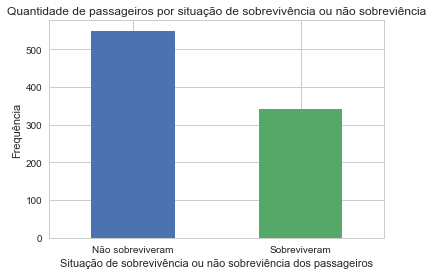

In [23]:
plot_count(df, "Survived", "bar")

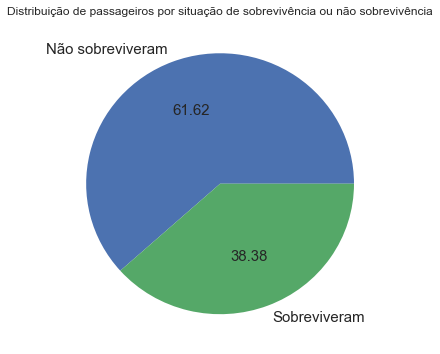

In [24]:
plot_count(df, "Survived", "pie")

Nesses dois gráficos, podemos visualizar que a maioria dos passageiros não sobreviveu.

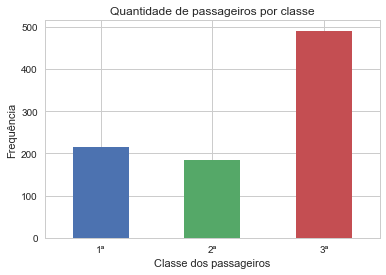

In [25]:
plot_count(df, "Pclass", "bar")

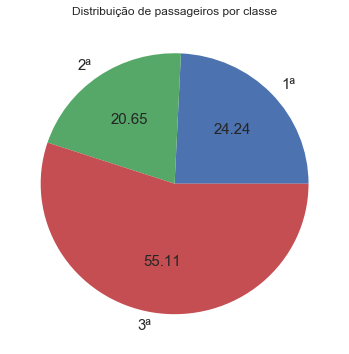

In [26]:
plot_count(df, "Pclass", "pie")

Nesses dois gráficos, podemos visualizar que a maioria dos passageiros era de 3ª classe.

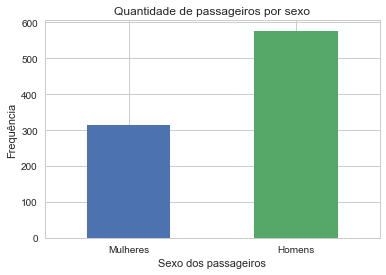

In [27]:
plot_count(df, "Sex", "bar")

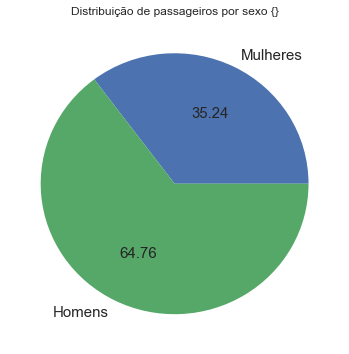

In [28]:
plot_count(df, "Sex", "pie")

Nesses dois gráfico, podemos visualizar que a maioria dos passageiros eram homens.

Passemos agora às variáveis quantitativas. Vamos montar o gráfico da variável "Age". Como dividimos as idades em intervalos, um bom gráfico para representar as frequências de cada intervalo seria o histograma. Vamos montá-lo:

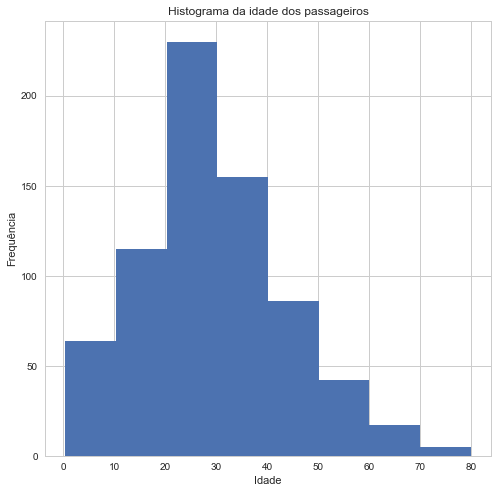

In [29]:
plot_count(df_age, "Age", "hist")

Nesse gráfoco, podemos perceber que o intervalo de idades com maior frequência é de 20 a 30 anos. Percebemos também que o histograma está distorcido para a direita. Uma outra forma de trabalhar com as idades seria agrupá-las por faixa etária. Podemos dividir as idades dos passageiros, por exemplo, nas seguintes faixas etárias:

- Criança: Idade menor do que 13 anos;
- Adolescente: Idade maior ou igual a 13 anos e menor do que 18 anos;
- Adulto: Idade maior ou igual a 18 anos e menor do que 60 anos;
- Idoso: Idade maior ou igual a 60 anos.

Vamos, então, incluir uma nova coluna na tabela "df_age", chamada "AgeRange".

In [30]:
bin_edges = [df_age["Age"].min(), 12.99, 17.99, 59.99, df_age["Age"].max()]
bin_names = ["child", "teenage", "adult", "oldman"]
df_age['AgeRange'] = pd.cut(df_age['Age'], bin_edges, labels=bin_names)
df_age.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeClass,AgeRange
0,0,3,male,22.0,1,0,20 —| 30,adult


Agora que criamos essa nova coluna, podemos criar também a respectiva tabela frequency_tables[]. Fica assim:

In [31]:
new_table = create_frequency_table(df_age, "AgeRange")
frequency_tables.append(new_table)
nb.update({"AgeRange" : count})
print(new_table)
count += 1

  AgeRange  Absolute_Frequency  Relative_Frequency
0    child                  68            0.076319
1  teenage                  44            0.049383
2    adult                 575            0.645342
3   oldman                  26            0.029181


Cabe destacar que agora passaremos a trabalhar com uma variável qualitativa ("AgeRange") e não mais quantitativa ("Age"). Assim, um gráfico que poderia ser utilizado para representar a distribuição dos passageiros entre as diferentes faixas etárias seria o de colunas. Vamos construí-lo:

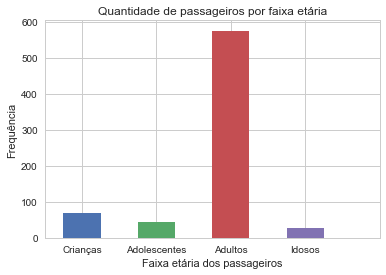

In [32]:
plot_count(df_age, "AgeRange", "bar")

Agora vamos para o gráfico das variáveis "SibSp" e "Parch". Um tipo de gráfico interessante para representar as suas respectivas distribuições seria o gráfico de disperção. Fica assim:

In [33]:
"""
      Função que acrescenta linhas com valor zero nas colunas de frequência absoluta e de frequência relativa
                  de determinada tabela de frequências.
      Argumentos:
          variable: A variável cuja tabela de frequências será modificada.
          indexes: Os índices correspondentes às linhas que precisam ser acrescentadas.

"""

def frequency_lines_zeros(variable, indexes):    
    number = nb[variable]
    frequency_tables[number] = frequency_tables[number].append(pd.DataFrame([[indexes[idx],0,0] for idx in range(len(indexes))], 
                    columns=[variable,"Absolute_Frequency","Relative_Frequency"]), ignore_index=True)
    frequency_tables[number].sort_values(variable, inplace=True)
    frequency_tables[number].reset_index(drop=True, inplace=True)

In [34]:
frequency_lines_zeros("SibSp", [6,7])
frequency_lines_zeros("Parch", [7,8])

In [35]:
"""
      Função que plota um único gráfico de linhas para duas variáveis, contendo as suas respectivas
                                                                    frequências absolutas ou médias.
      Argumentos:
          variables: Lista das duas variáveis que aparecerão no gráfico.
          y_tipes: String especificando se o gráfico será de frequências absolutas ou de médias.

"""

def double_plot(variables, y_type):
    if y_type == "Absolute_Frequency":
        translation = "Qauntidade"
    elif y_type == "Mean":
        translation = "Média"
    locations = np.arange(len(frequency_tables[nb[variables[0]]][y_type]))
    plt.figure(figsize=(10,7))
    plt.plot(locations, frequency_tables[nb[variables[0]]][y_type], color='b')
    plt.plot(locations, frequency_tables[nb[variables[1]]][y_type], color='r')
    plt.ylabel('{} de passageiros'.format(translation))
    plt.xlabel('Nº de familiares a bordo')
    plt.title('{} de passageiros por nº de familiares a bordo'.format(translation))
    labels = list(locations)  # rótulos dos marcadores no eixo x
    plt.xticks(locations, labels, rotation="horizontal")
    plt.legend(["Irmãos/Cônjuge","Pais/Filhos"], fontsize=20);

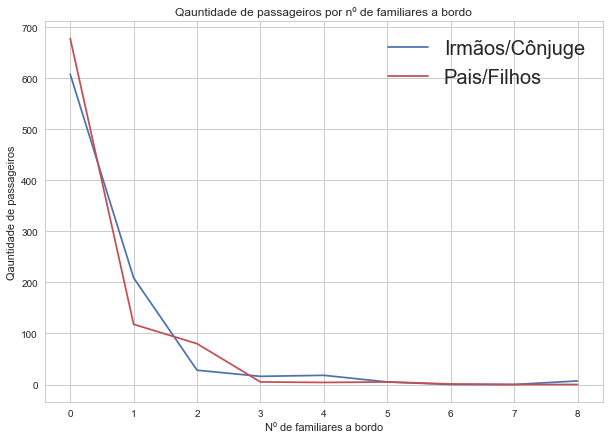

In [36]:
double_plot(["SibSp","Parch"], "Absolute_Frequency")

Por meio desse gráfico percevemos que, em geral, quanto maior o número de familiares de uma mesma modalidade, menor a frequência.

Podemos também utilizar gráficos de colunas para relacionar as diferentes variáveis qualitativas às suas respectivas médias de sobrevivência. Para armazenar as médias, uma ideia seria adicionar uma nova coluna chamada "Mean" a todas as tabelas frequency_tables[] (exceto a correspondente à variável "Survived", pois, logicamente, a média de sobrevivência seria de 100% entre os sobreviventes e de 0% entre os não sobreviventes, o que não agrega nenhuma informação). Façamos essa coluna "Mean".

In [37]:
var_mean = {} #Dicionário que tem como chave o nome das variáveis e como valor retornado uma lista com suas respectivas médias 
for column in df.columns[np.r_[1,2,4,5]]:
    var_mean.update({column : df.groupby(column)["Survived"].mean()})
var_mean.update({"AgeClass" : df_age.groupby("AgeClass")["Survived"].mean()})
var_mean.update({"AgeRange" : df_age.groupby("AgeRange")["Survived"].mean()})

In [38]:
"""
      Função que corrige o dicionário "var_mean", acrescentando linhas com valores zero, a fim
                de que este dicionário possa ser utilizado para a inclusão da coluna "Mean" nas tabelas de frequência.
      Argumentos:
          variable: Variável que servirá como chave para o dicionário "var_mean".
          indexes: Índices das linhas que serão acrescentadas.

"""

def mean_lines_zeros(variable, indexes):
    var_mean[variable] = var_mean[variable].append(pd.Series([0,0], index=indexes))
    var_mean[variable] = var_mean[variable].sort_index()

In [39]:
mean_lines_zeros("SibSp", [6,7])
mean_lines_zeros("Parch", [7,8])

In [40]:
for column in df.columns[np.r_[1,2,4,5]]:
    frequency_tables[nb[column]]["Mean"] = [var_mean[column][key] for key in var_mean[column].keys()]
frequency_tables[nb["AgeClass"]]["Mean"] = [var_mean["AgeClass"][key] for key in var_mean["AgeClass"].keys()]
frequency_tables[nb["AgeRange"]]["Mean"] = [var_mean["AgeRange"][key] for key in var_mean["AgeRange"].keys()]

A tabela frequency_tables[] da variável "Pclass", por exemplo, ficou assim:

In [41]:
print(frequency_tables[nb["Pclass"]])

   Pclass  Absolute_Frequency  Relative_Frequency      Mean
0       1                 216            0.242424  0.629630
1       2                 184            0.206510  0.472826
2       3                 491            0.551066  0.242363


Vamos plotar um gráfico de colunas para as médias das variáveis qualitativas. Temos o seguinte:

In [42]:
"""
      Função de gera um gráfico de barras ou de linhas contendo as médias de sobreviventes para determinada variável.
      Argumentos:
          dataframe: O dataframe que será tomado como base para o gráfico.
          variable: A variável cujas médias serão obtidas.
          plot_kind: O tipo de gráfico que será construído, podendo ser de colunas ou de linhas.

"""

def plot_mean(dataframe, variable, plot_kind):
    dataframe.groupby(variable).mean()["Survived"].plot(kind=plot_kind) 
    locations = np.arange(dataframe[variable].unique().size)
    if plot_kind == "bar":
        labels = translate_for_plots(variable)[1]
    elif plot_kind == "line":
        labels = ["0—|10","10—|20","20—|30","30—|40","40—|50","50—|60","60—|70","70—|80"]
    plt.title('Média de sobrevivência por {}'.format(translate_for_plots(variable)[0].lower()))
    plt.xlabel('{} dos passageiros'.format(translate_for_plots(variable)[0]))
    plt.ylabel('Média de passageiros sobreviventes')
    plt.xticks(locations, labels, rotation='horizontal');

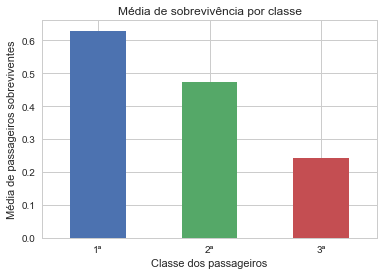

In [43]:
plot_mean(df, "Pclass", "bar")

Vemos nesse grafico que, quanto maior a classe, menor a média de sobrevivência.

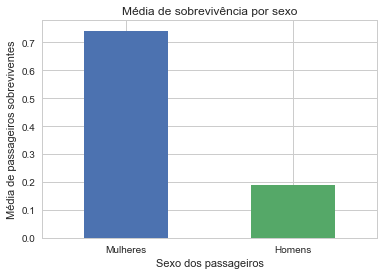

In [44]:
plot_mean(df, "Sex", "bar")

Vemos nesse gráfico que a média de sobrevivência é bem maior para as mulheres.

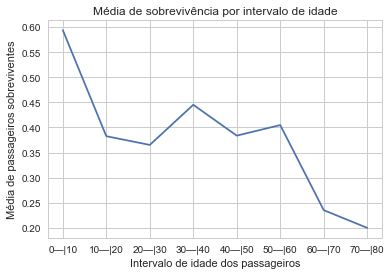

In [45]:
plot_mean(df_age, "AgeClass", "line")

Esse gráfico nos mostra que, em geral, a média de sobrevivência tende a decrescer com o aumento da idade. Contudo, essa relação não é absoluta. No meio do gráfico há intervalos em que a média de sobrevivência é crescente.

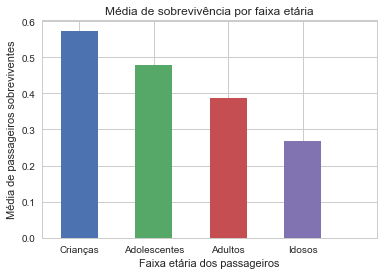

In [46]:
plot_mean(df_age, "AgeRange", "bar")

Vemos nesse gráfico que, quanto maior a faixa etária, menor a média de sobrevivência.

Vamos agora construir um gráfico de linhas para as médias das variáveis "SibSp" e "Parch", que são quantitativas.

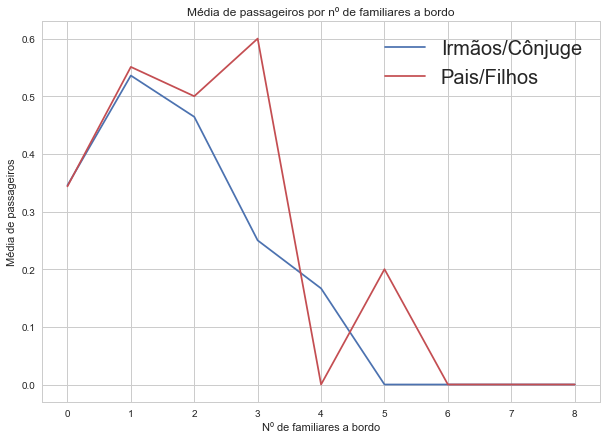

In [47]:
double_plot(["SibSp","Parch"], "Mean")

Podemos observar no gráfico acima que a linha correspondente à variável "SibSp" começa crescente mais torna-se decrescente a partir da quantidade de irmão ou cônjuge a bordo. A linha correspondente à variável "Parch", por sua vez, já não segue uma tendência muito bem definida, sendo ora crescente ora decrescente.

Passemos agora às conclusões.

## Tirando conclusões

Para tentar responder as questões inicialmente formuladas, iremos construir alguns gráficos relacionando a variável sobrevivência às demais variáveis. Comecemos por um gráfico de barras mostrando a quantidade total tanto de sobreviventes como não sobreviventes para cada classe de passageiros.



In [48]:
"""
      Função que plota um gráfico de barras ou de linhas contendo as frequências absolutas ou relativas
                              tanto dos sobreviventes como dos não sobreviventes para uma dada variável.
      Argumentos:
          dataframe: O dataframe que servirá como base para a construção do gráfico.
          variale: A variável cujas frequências serão mostradas.
          y_type: String que especifica se as frequências serão abolutas ou relativas.
          plot_kind: O tipo de gráfico, podendo ser de colunas ou de linhas.

"""

def plot_comparation_bar(dataframe, variable, y_type, plot_kind):
    if variable == "Pclass":
        other_var = "Sex"
    else:
        other_var = "Pclass"
    if y_type == "quantity":
        eixo_y = "Quantidade"
    elif y_type == "proportion":
        eixo_y = "Proporção"
    var_survive = dataframe.groupby(["Survived", variable]).count()[other_var].rename("")
    total_survive = dataframe.groupby('Survived').count()[other_var]
    prop_dont_survived = var_survive[0] / total_survive[0]
    prop_survived = var_survive[1] / total_survive[1]
    
    width = 0.3
    if plot_kind == "bar":
        labels = translate_for_plots(variable)[1]
    elif plot_kind == "line":
        labels = ["0—|10","10—|20","20—|30","30—|40","40—|50","50—|60","60—|70","70—|80"]
    if y_type == "quantity":
        ind = np.arange(len(var_survive[0]))
        if plot_kind == "bar":
            bars_dont_survived = plt.bar(ind, var_survive[0], width, color='r', alpha=.7, label='Não sobreviveram')
            bars_survived = plt.bar(ind + width, var_survive[1], width, color='b', alpha=.7, label='Sobreviveram')
        elif plot_kind == "line":
            plt.figure(figsize=(10,7))
            bars_dont_survived = plt.plot(ind, var_survive[0], color='r', alpha=.7)
            bars_survived = plt.plot(ind, var_survive[1], color='b', alpha=.7)
    elif y_type == "proportion":
        ind = np.arange(len(prop_survived))
        if plot_kind == "bar":
            bars_dont_survived = plt.bar(ind, prop_dont_survived, width, color='r', alpha=.7, label='Não sobreviveram')
            bars_survived = plt.bar(ind + width, prop_survived, width, color='b', alpha=.7, label='Sobreviveram')
        elif plot_kind == "line":
            plt.figure(figsize=(10,7))
            bars_dont_survived = plt.plot(ind, prop_dont_survived, color='r', alpha=.7)
            bars_survived = plt.plot(ind, prop_survived, color='b', alpha=.7)
    plt.ylabel('{} de passageiros'.format(eixo_y))
    plt.xlabel('{} dos passageiros'.format(translate_for_plots(variable)[0]))
    plt.title('{} de sobreviventes e não sobreviventes por {}'.format(eixo_y, translate_for_plots(variable)[0].lower()))
    if plot_kind == "bar":
        locations = ind + width / 2
    elif plot_kind == "line":
        locations = ind
    plt.xticks(locations, labels, rotation='horizontal')
    if plot_kind == "bar":
        plt.legend();
    elif plot_kind == "line":
        plt.legend(["Não sobreviveram", "Sobreviveram"], fontsize=20);

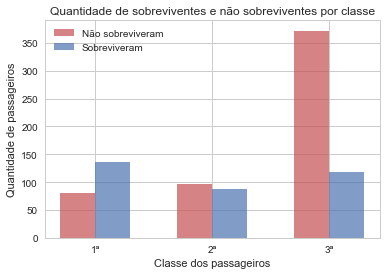

In [49]:
plot_comparation_bar(df, "Pclass", "quantity", "bar")

Nesse gráfico é possível perceber que a grande maioria dos não sobreviventes era de 3ª classe, enquanto que a maioria dos sobreviventes era de 1ª classe. Para analisar melhor a relação entre a classe do passageiro e sobrevivência ao desastre, devemos obervar como fica o gráfico de barras quando trabalhamos com proporções. Montemos o gráfico.

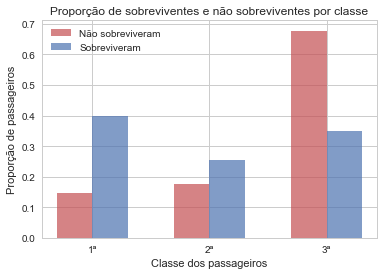

In [50]:
plot_comparation_bar(df, "Pclass", "proportion", "bar")

Esse gráfico tem a vantagem de possibilitar uma melhor comparação entre a distribuição dos sobreviventes e dos não sobreviventes. A comparação entre as barras vermelha e azul fica "mais justa", pois não leva em consideração o total de passageiros sobreviventes e não sobreviventes, apenas as suas respectivas distribuições proporcionais entre as classes. Assim, se o número de sobreviventes e de não sobreviventes fosse igual, o gráfico da distribuição total de sobreviventes e não sobreviventes por classe ficaria mais parecido com essa último gráfico (o das proporção).

Façamos também um grafico de pizza para cada uma das classes, que mostre o percentual de sobreviventres e não sobreviventes considerando somente os passageiros pertenceiros à respectiva classe do gráfico. Fica assim:

In [51]:
"""
      Função que gera um gráfico de setores com a proporção de sobreviventes e não sobreviventes
                          para um valor específico de determinada variável.
      Argumentos:
          dataframe: O dataframe que servirá de parâmetro para a construção do gráfico.
          variable: A variável cujos dados serão mostrados no gráfico.
          value: O valor específico da variável para o qual serão mostradas as proporções de sobreviventes
                      e não sobreviventes.

"""

def plot_comparation_pie(dataframe, variable, value):
    if variable == "Pclass":
        other_var = "Sex"
    else:
        other_var = "Pclass"
    if value == 1:
        translate = "1ª"
    elif value == 2:
        translate = "2ª"
    elif value == 3:
        translate = "3ª"
    elif value == "male":
        translate = "masculino"
    elif value == "female":
        translate = "feminino"
    elif value == "child":
        translate = "crianças"
    elif value == "teenage":
        translate = "adolescentes"
    elif value == "adult":
        translate = "adultos"
    elif value == "oldman":
        translate = "idosos"
    
    if variable == "Pclass":    
        title_name="Proporção de sobreviventes e não sobreviventes da {} classe"
    elif variable == "Sex":
        title_name="Proporção de sobreviventes e não sobreviventes do sexo {}"
    elif variable == "AgeRange":
        title_name="Proporção de {} sobreviventes e não sobreviventes"
    
    dataframe.groupby([variable, "Survived"]).count()[other_var][value].rename("").plot(kind="pie", figsize=(6,6), 
            autopct='%.2f', labels=["Não sobreviveram", "Sobreviveram"], title=title_name.format(translate), fontsize=15);

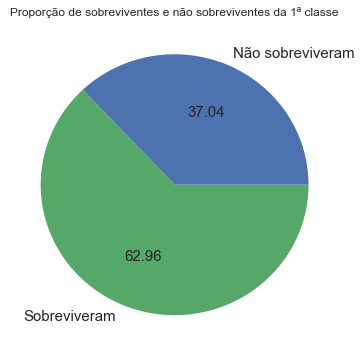

In [52]:
plot_comparation_pie(df, "Pclass", 1)

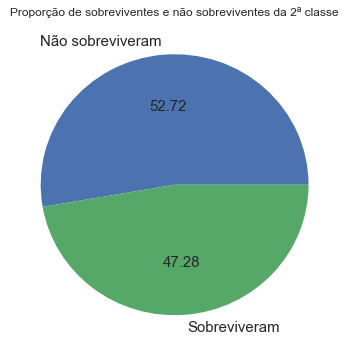

In [53]:
plot_comparation_pie(df, "Pclass", 2)

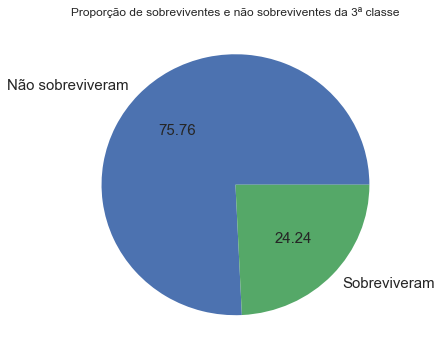

In [54]:
plot_comparation_pie(df, "Pclass", 3)

A sequência desses três gráficos nos mostra que, quanto maior o grau da classe, menor é a respectiva fatia de sobreviventes (em verde). Esses valores coindem com os resultados encontrados no gráfico da média de sobrevivência das classes.

Devemos responder a primeira das perguntas formuladas: o número da classe dos passageiros impactou na possibilidade de sobrevivência de cada um?

<div style="text-align: justify">A partir da análise dos gráficos, podemos perceber que na 3º classe o número de não sobreviventes supera muito o número de sobreviventes. Já na 1ª classe ocorre o contrário, o número de sobreviventes é muito maior do que o dos que não sobreviveram.</div>

Portando, respondendo a primeira pergunta, entendemos que sim, os gráficos indicam que o número da classe impactou negativamente na possbilidade de sobrevivência, o que pode ser percebido pelo gráfico decrescente das médias de sobrevivência em relação ao número da classe, bem como pela análise dos graficos de pizza. Quanto maior a classe, menor parecem ter sido as chances de sobreviver.

A segunda pergunta que iremos responder é a seguinte: qual a média de idade dos sobreviventes? Quantos irmãos/cônjuge eles tinham a bordo, em média? E de pais/fihos, em média?

In [55]:
age_mean = df_age.groupby("Survived")["Age"].mean()[1]
print("A média de idade dos sobreviventes era de aproximadamente {} anos".format(int(age_mean)))

A média de idade dos sobreviventes era de aproximadamente 28 anos


In [56]:
sibsp_mean = df_age.groupby("Survived")["SibSp"].mean()[1]
print("A média do número de irmãos/cônjuge dos sobreviventes era de {} anos".format(sibsp_mean))

A média do número de irmãos/cônjuge dos sobreviventes era de 0.49310344827586206 anos


In [57]:
parch_mean = df_age.groupby("Survived")["Parch"].mean()[1]
print("A média do número de pais/filhos dos sobreviventes era de {} anos".format(parch_mean))

A média do número de pais/filhos dos sobreviventes era de 0.5275862068965518 anos


Construiremos agora o gráfico de colunas da variável sexo, a fim de entendermos melhor a sua relação com a variável sobrevivência.

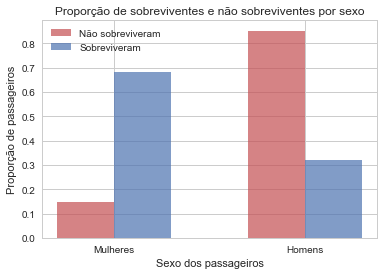

In [58]:
plot_comparation_bar(df, "Sex", "proportion", "bar")

Podemos ver nesse gráfico que a proporção de sobreviventes é muito maior entre as mulheres do que entre os homens. A proporção de homens que não sobreviveram é muito grande. Analisemos os gráficos de pizza de sobrevivência para cada sexo:

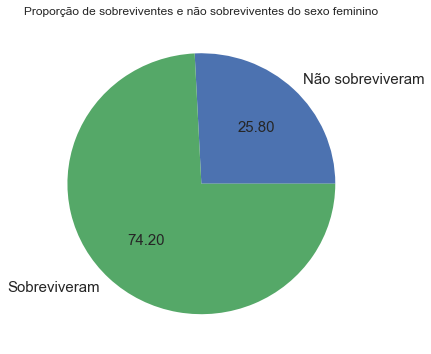

In [59]:
plot_comparation_pie(df, "Sex", "female")

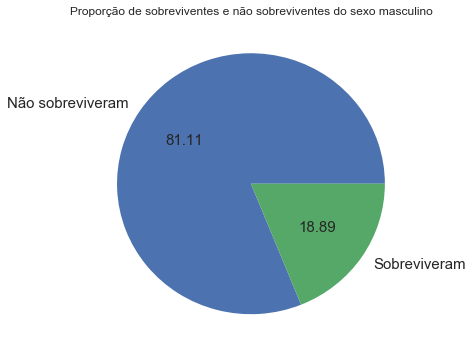

In [60]:
plot_comparation_pie(df, "Sex", "male")

A comparação entre esses dois gráficos feixa bem clara a diferença de percentual de sobrevivência entre os homens e as mulheres. O resultado corresponde exatamente àquele que encontramos ao analisarmos as médias de sobrevivência por sexo. Podemos também comparar a sobrevivência entre os sexos distinguindo também as classes. Teríamos assim o seguinte gráfico:

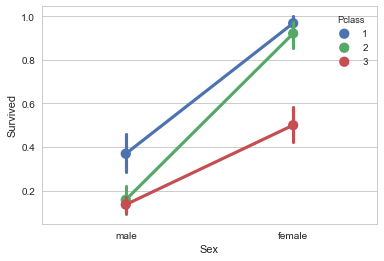

In [61]:
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=df);

O gráfico acima nos mostra, por exemplo, que a classe com maior diferença de proporção de sobreviventes entre homens e mulheres é a 2ª (o gráfico tem maior amplitude). Podemos ver também que a proporção de mulheres da primeira classe que sobreviveu é muito alta, ficando próximo de 100%. 

Vejamos, agora, como é a relação entre as idades e variável sobrevivência. Seria interessante utilizarmos, para isso, um gráfico de caixa. Fica assim:

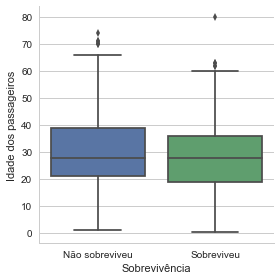

In [62]:
sns.factorplot(x="Survived", y="Age", data=df_age, kind="box").set_axis_labels('Sobrevivência',
                   'Idade dos passageiros').set_xticklabels(["Não sobreviveu", "Sobreviveu"]);

Esse gráfico nos mostra que os sobreviventes, em geral, são pessoas mais novas que os não sobreviventes. Podemos, ainda, recriar o boxplot "sobreviência X idade" incluindo a distinção entre homens e mulheres. Fica assim:

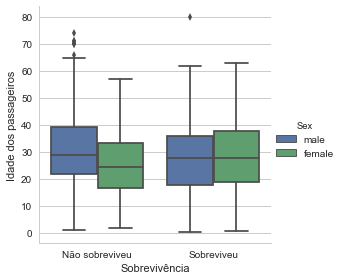

In [63]:
sns.factorplot(x="Survived", y="Age", data=df_age, kind="box", hue='Sex').set_axis_labels('Sobrevivência',
                   'Idade dos passageiros').set_xticklabels(["Não sobreviveu", "Sobreviveu"]);

Nesse gráfico, temos a possibilidade de ver que, embora os sobreviventes sejam, em geral, mais novos que os não sobreviventes, as mulheres sobreviventes são, em geral, mais velhas que as não sobreviventes. Outro gráfico que podemos utilizar é o de linhas, dessa forma:

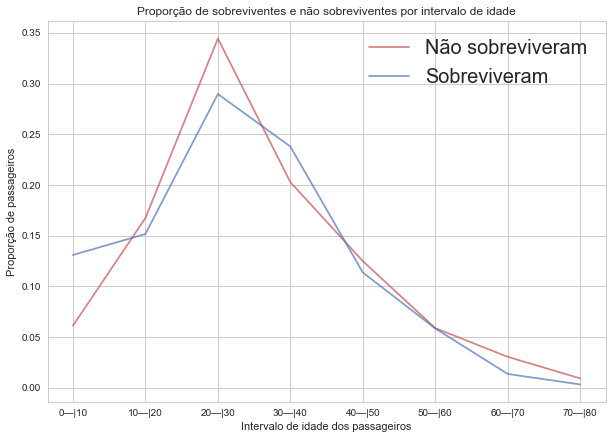

In [64]:
plot_comparation_bar(df_age, "AgeClass", "proportion", "line")

Esse gráfico nos mostra que tanto entre os sobreviventes como entre os não sobreviventes o intervalo de idades com maior proporção de passageiros é o de 20 a 30 anos.

Vejamos, agora, como fica a relação entre as faixas etárias e a sobrevivência em um gráfico de colunas.

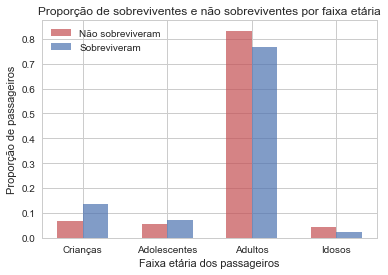

In [65]:
plot_comparation_bar(df_age, "AgeRange", "proportion", "bar")

Observamos nesse gráfico que tanto entre os sobreviventes como entre os não sobreviventes, a maior parte é composta por adultos e a menor parte por idosos. Para fazer uma análise mais completa, vamos aos gráficos de setores:

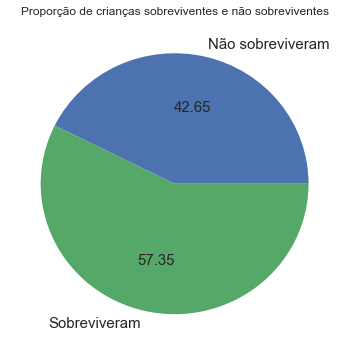

In [66]:
plot_comparation_pie(df_age, "AgeRange", "child")

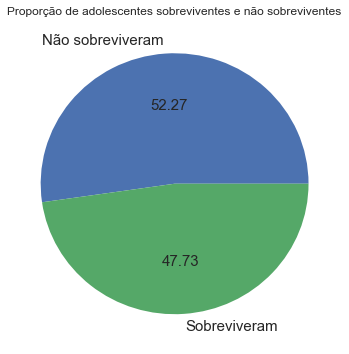

In [67]:
plot_comparation_pie(df_age, "AgeRange", "teenage")

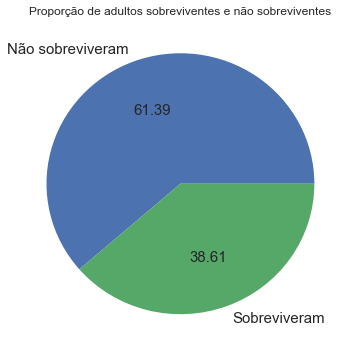

In [68]:
plot_comparation_pie(df_age, "AgeRange", "adult")

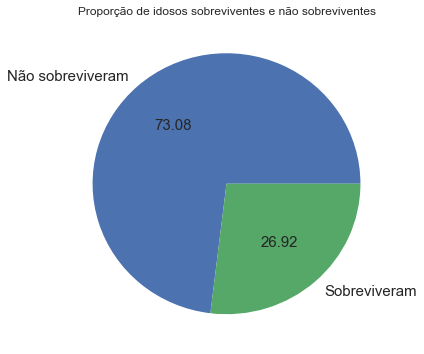

In [69]:
plot_comparation_pie(df_age, "AgeRange", "oldman")

A comparação entre esses gráficos nos mostra que a faixa etária das crianças parece ser aquela que tem maior chance de sobrevivência, enquanto que a faixa dos idosos parece ter a menor chance de sobrevivência.

Assim, já temos condições de responder a terceira das perguntas inicialmente formuladas: qual sexo e qual faixa etária estão associados a um maior número de sobreviventes, em termos proporcionais? Os gráficos indicam que, proporcionalmente falando, o maior número de sobreviventes está entre as mulheres e as crianças.

Agora analisemos a relação das variáveis "SibSb" e "Parch" com a variável "Survived". Iremos o gráfico de linhas, mas antes, vamos preencher com zero os valores únicos faltantes nessas duas variáveis, para que possam ser colocadas em um mesmo gráfico.

In [70]:
sibsp_survive = df.groupby(["Survived", "SibSp"]).count()["Pclass"].rename("")
print(sibsp_survive)

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: , dtype: int64


In [71]:
parch_survive = df.groupby(["Survived", "Parch"]).count()["Pclass"].rename("")
print(parch_survive)

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        233
          1         65
          2         40
          3          3
          5          1
Name: , dtype: int64


In [72]:
sibsp_surv = sibsp_survive[1].append(pd.Series([0], index=[5]))
parch_surv = parch_survive[1].append(pd.Series([0], index=[4]))

Agora já estamos prontos para construir o gráfico.

In [73]:
"""
      Função que gera um gráfico de linhas contendo simultaneamente as frequências 
                           absolutas ou relativasde sobreviventes de duas variáveis.
      Argumentos:
          dataframe: O dataframe que servirá de parâmetro para a construção do gráfico.
          variable: A variável cujas frequências de sobreviventes serão mostradas.
          y_type: String especificando se as frequências mostradas serão absolutas ou relativas.

"""

def plot_comparation_line(dataframe, variables, y_type):
    other_var = "Pclass"
    if y_type == "quantity":
        eixo_y = "Quantidade"
    elif y_type == "proportion":
        eixo_y = "Proporção"
    if y_type == "quantity":
        translation = "Quantidade"
    elif y_type == "proportion":
        translation = "Proporção"
    total_survive = df.groupby('Survived').count()[other_var]
    prop_survived_1 = variables[0] / total_survive[1]
    prop_survived_2 = variables[1] / total_survive[1]
    
    plt.figure(figsize=(10,7))
    if y_type == "quantity":
        locations = np.arange(len(variables[0]))
        plt.plot(locations, variables[0], color='b', alpha=.7, label='Não sobreviveram')
        plt.plot(locations, variables[1], color='r', alpha=.7, label='Sobreviveram')
    elif y_type == "proportion":
        locations = np.arange(len(prop_survived_1))
        plt.plot(locations, prop_survived_1, color='b', alpha=.7, label='Não sobreviveram')
        plt.plot(locations, prop_survived_2, color='r', alpha=.7, label='Sobreviveram')
    plt.ylabel('{} de sobreviventes'.format(translation))
    plt.xlabel('Nº de familiares a bordo')
    plt.title('{} de sobreviventes por nº de familiares a bordo'.format(translation))
    labels = list(locations)  # rótulos dos marcadores no eixo x
    plt.xticks(locations, labels, rotation="horizontal")
    plt.legend(["Irmãos/Cônjuge","Pais/Filhos"], fontsize=20);

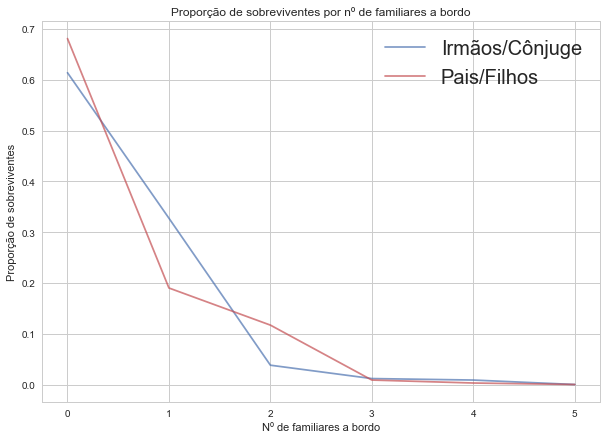

In [74]:
plot_comparation_line(df_age, [sibsp_surv, parch_surv], "proportion") 

Ambas as linhas mostram que quanto maior o número de familiares a bordo, menor é a proporção entre os sobreviventes. A distribuição desses dois grupos parece ser bem parecida.

Podemos, agora, responder a quarta pergunta e última pergunta: Comparando o número de irmãos/cônjuges e o número de pais/filhos dos passageiros, qual desses dois fatores interferiu mais significativamente nas chances dos passageiros de sobreviverem? A melhor maneira de responder a essa pergunta parece ser recorrer àquela tabela de médias de sobrevivência por idade, que fizemos na fase de exploração, que compara as médias comparadas dos dois grupos. Por aquele gráfico é possível perceber que, em geral, a média de sobrevivência é maior para aqueles que tem mais pais/filhos a bordo do que irmãos/cônjuge a bordo. 

Vejamos novamente:

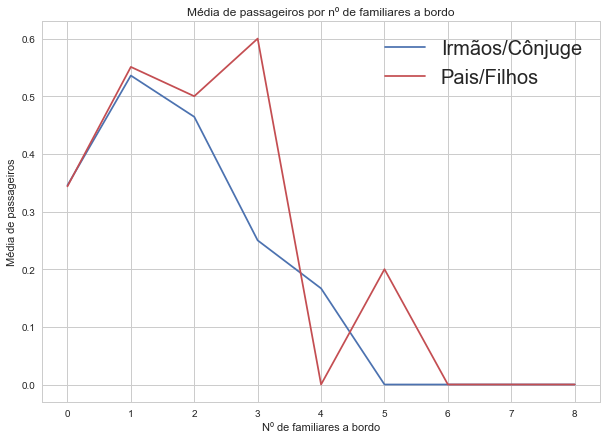

In [75]:
double_plot(["SibSp","Parch"], "Mean")

O gráfico sugere que ter pelo menos um pai ou filho a bordo aumentaria as chances de sobrevivência. Essa seria a situação mais favorável, pois, aumentando a quantidade de pais/filhos a média de sobrevivência passa a ser decrescente. Quanto ao número de irmãos/cônjuge, a relação parece ser muito mais arbitrária, tendo em vista as oscilações no gráfico.

## CONCLUSÃO

Embora tenhamos utilizado apenas estatística descritiva na nossa análise, as nossas observações nos levam a concluir provisoriamente que as chances de sobrevivência no Titanic eram maiores para mulheres, crianças e passageiros de 1ª classe. A condição socioeconômica do passageiro parece ter sido, assim, um fator fundamental para selecionar os que conseguiriam sobreviver.

Dos fatores que analisamos (classe, sexo, idade, número de irmãos/cônjuge e número de pais/filhos) podemos concluir que todos eles tiveram algum impacto sobre a sobrevivência dos passageios, embora em graus diferentes. A idade, por si só, não é um fator decisivo, mas, levando em consideração a separação por grupos de faixa etária, o pertencimento ou não a cada um desses grupos parece ter feito, sim, uma grande diferença. Fatores como a classe e o sexo também parecem ter um direcionamento claro sobre o tipo de influência de exerceram na questão da sobrevivência. Pudemos constatar que os grupos de passageiros mais favorecidos foram os das mulheres, crianças e de 1ª classe e os menos favorecidos foram os homens, idosos e de 3ª classe.

Com relação ao número de irmãos/cônjuge e ao número de pais/filhos, ainda que estes tenham também influenciado as chances de sobrevivência, a relação não é inequívoca, podendo ter ajudado ou prejudicado a depender de quantos eram os familiares a bordo.

Cumpre reforçar que as conclusões aqui encontradas não são definitivas, mas apenas indícios a respeito das propabilidades de sobrevivência.

#### Limitações:

Uma limitação da análise foi o fato de que muitos passageiros não tinham a idade registrada no nosso conjunto de dados. Isso acabou impactando nos resultados que envolviam essa variável de forma isolada ou combinada com outras variáveis. Em qualquer parte desta análise que envolvia, de algum modo, a variável idade foi utilizado uma cópia do dataframe original na qual foram excluídas as linhas com idades faltantes.

Outra limitação foi a utilização do sistema de faixas etárias adotado no Brasil atualmente, pelo Estatuto de Defesa da Criança e do Adolescente, pelo Código Civil e pelo Estatuto do Idoso. Certamente, esse não era o padrão a que os passageiros do Titanic estavem habituados.

### Referências

- https://www.kaggle.com/c/titanic/data
- https://docs.python.org/3/library/index.html
- https://matplotlib.org/users/pyplot_tutorial.html
- https://seaborn.pydata.org/tutorial/categorical.html